<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Data_Proprecessing/Segmentation_Geolife_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = 'drive/MyDrive/University/PiLab/Experiment/Data/Test/Geolife/'

In [3]:
os.chdir( data_dir )

In [12]:
trainFiles = glob.glob( '*plt' )
n = len( trainFiles )

trajectory_data = [ ]
for i, file in enumerate(trainFiles):
    csv_file = pd.read_csv( file, names = [ 'lat', 'long', 'zero', 'alti', 'date_number', 'date_string', 'time'  ] )[6:]
    csv_file.index = range( 0, len( csv_file ) )
    print(csv_file.head())

    curr_trajectory = [ ]
    for lat, long in zip( csv_file['lat'], csv_file['long'] ):
        curr_trajectory.append( [ float(lat), float(long) ] )

    trajectory_data.append( np.array( curr_trajectory ) )

         lat        long  zero alti   date_number date_string      time
0   40.01229  116.297072   0.0  492  39749.026690  2008-10-28  00:38:26
1  40.012594  116.297269   0.0  490  39749.026748  2008-10-28  00:38:31
2  40.012581  116.297263   0.0  490  39749.026806  2008-10-28  00:38:36
3  40.012453  116.297177   0.0  490  39749.026863  2008-10-28  00:38:41
4  40.012398  116.297133   0.0  490  39749.026921  2008-10-28  00:38:46
         lat        long  zero alti   date_number date_string      time
0  39.984702  116.318417   0.0  492  39744.120185  2008-10-23  02:53:04
1  39.984683  116.318450   0.0  492  39744.120255  2008-10-23  02:53:10
2  39.984686  116.318417   0.0  492  39744.120313  2008-10-23  02:53:15
3  39.984688  116.318385   0.0  492  39744.120370  2008-10-23  02:53:20
4  39.984655  116.318263   0.0  492  39744.120428  2008-10-23  02:53:25
         lat        long  zero alti   date_number date_string      time
0  40.008304  116.319876   0.0  492  39745.090266  2008-10-24  0

# K means

In [23]:
colors = [ 'red', 'orange', 'green', 'blue' ]
ks = [ 2, 2, 2, 3, 4 ]

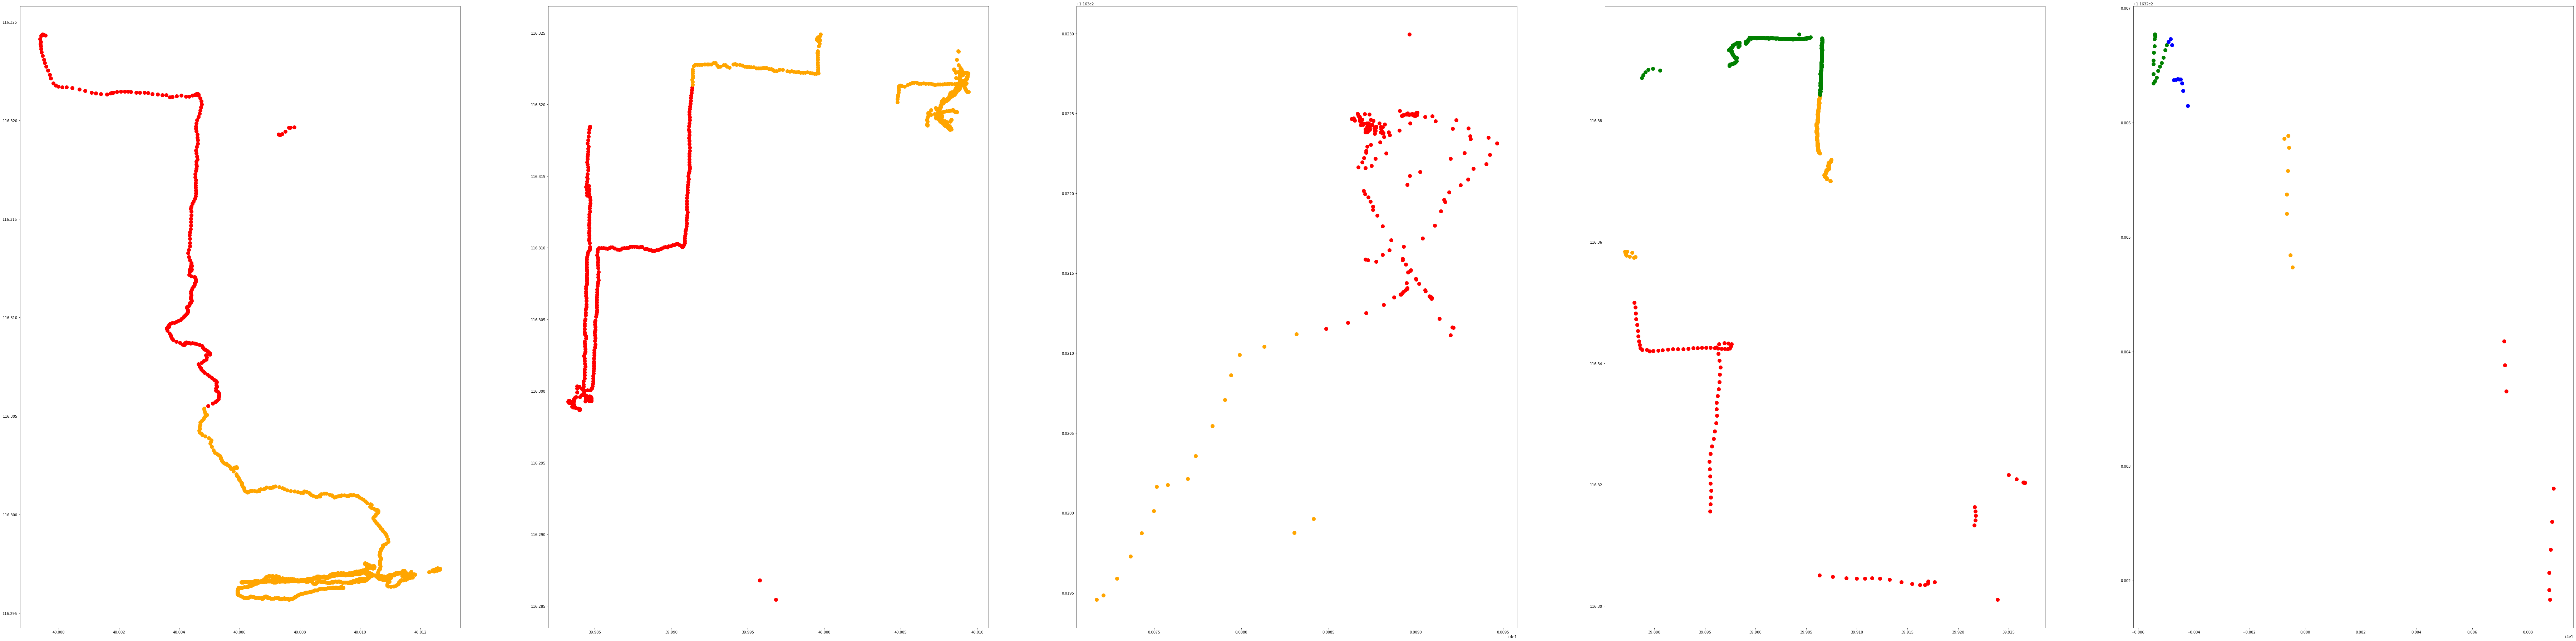

In [26]:
from scipy.cluster.vq import kmeans2

n = len( trajectory_data )
fig, ax = plt.subplots( 1, n, False, False, figsize = ( 128, 32 ) )
for i, data in enumerate( trajectory_data ):
    centroids, label = kmeans2( data, ks[i], iter = 100, minit = 'points' )
    for j in range( ks[i] ):
        ax[i].scatter( data[label == j, 0], data[label == j, 1], c = colors[j], s = 100 )

plt.savefig( 'Result.png', dpi = 100 )
plt.show()